In [260]:
import numpy as np
from toqito.channels import partial_trace
from numpy import linalg as LA

import matplotlib.pyplot as plt
%matplotlib inline

### Expressing the rate $R$ in terms of probability $p$

In [261]:
def rate_state3(p):
    if (1+p)/2 > 0 and (1-p)/2 > 0:
        return 1+((1+p)/2)*np.log2((1+p)/2)+((1-p)/2)*np.log2((1-p)/2)
    elif (1-p)/2 == 0:
        return 1+((1+p)/2)*np.log2((1+p)/2)+0

In [262]:
def rate_state4(p):
    if (1+3*p)/4 > 0 and (1-p)/4 > 0:
        return 1+(3*(1-p)/4)*np.log2((1-p)/4)+((1+3*p)/4)*np.log2((1+3*p)/4)
    elif (1-p)/4 == 0:
        return 1+0+((1+3*p)/4)*np.log2((1+3*p)/4)

In [263]:
def rate_state5(p):
    if (1+p)/2 > 0 and (1-p)/2 > 0:
        return 1+((1+p)/2)*np.log2((1+p)/4)+((1-p)/2)*np.log2((1-p)/4)
    elif (1-p)/4 == 0:
        return 1+((1+p)/2)*np.log2((1+p)/4)

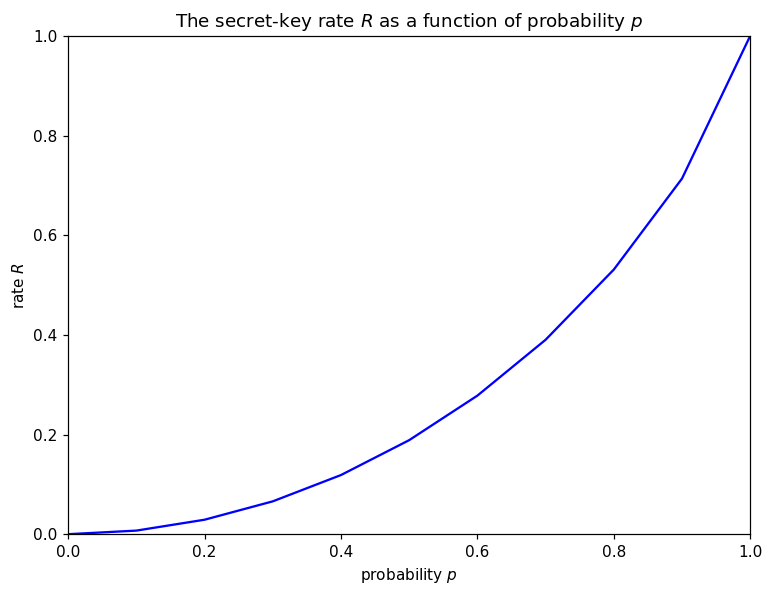

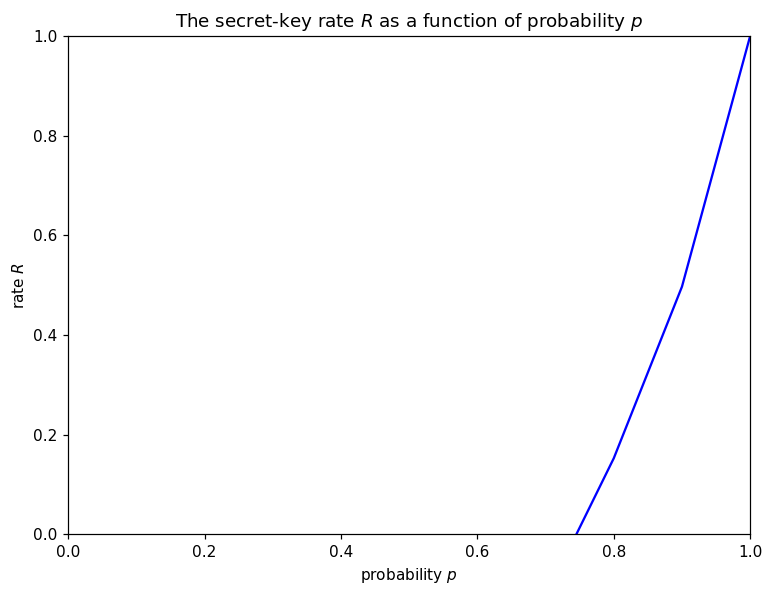

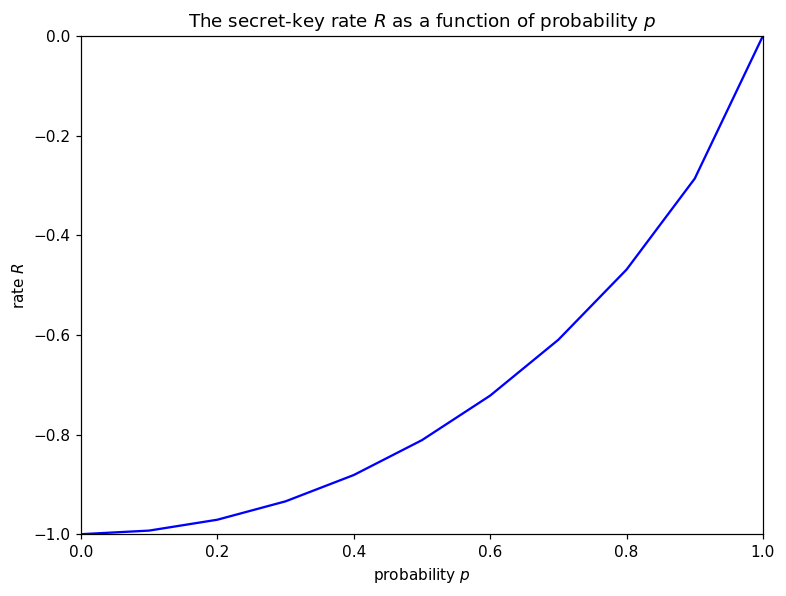

In [264]:
Proba = np.arange(0, 1.1, 0.1)
R3 = np.arange(0, 1.1, 0.1)
R4 = np.arange(0, 1.1, 0.1)
R5 = np.arange(0, 1.1, 0.1)

i = 0
for p in Proba:
    R3[i] = rate_state3(p)
    R4[i] = rate_state4(p)
    R5[i] = rate_state5(p)
    i += 1

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Proba, R3, label=labelR3, color="blue")
plt.title('The secret-key rate ' r'$R$' ' as a function of probability ' r'$p$')
plt.xlabel('probability ' r'$p$')
plt.ylabel('rate ' r'$R$')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()  

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Proba, R4, label=labelR4, color="blue")
plt.title('The secret-key rate ' r'$R$' ' as a function of probability ' r'$p$')
plt.xlabel('probability ' r'$p$')
plt.ylabel('rate ' r'$R$')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show() 

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Proba, R5, label=labelR5, color="blue")
plt.title('The secret-key rate ' r'$R$' ' as a function of probability ' r'$p$')
plt.xlabel('probability ' r'$p$')
plt.ylabel('rate ' r'$R$')
plt.ylim(-1, 0)
plt.xlim(0, 1)
plt.show()  


### Expressing the rate $R$ in terms of angle $\theta$

In [265]:
def rate_state6(t):
    if np.cos(t) == 0:
        return -0-2*(np.sin(t)**2)*np.log2(np.sin(t))
    elif np.sin(t) == 0:
        return -2*(np.cos(t)**2)*np.log2(np.cos(t))-0
    else:
        return -2*(np.cos(t)**2)*np.log2(np.cos(t))-2*(np.sin(t)**2)*np.log2(np.sin(t))

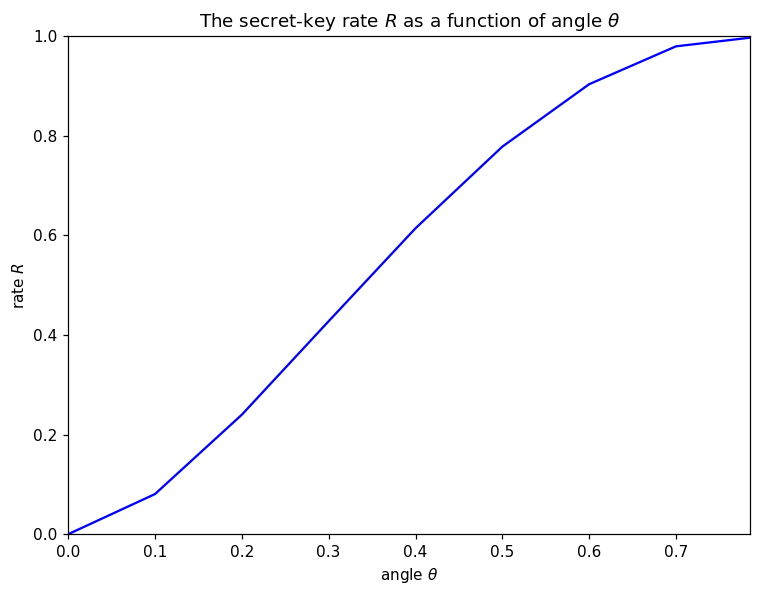

In [266]:
Thetas = np.arange(0, np.pi/4+0.1, 0.1)
R6 = np.arange(0, np.pi/4+0.1, 0.1)

i = 0
for t in Thetas:
    R6[i] = rate_state6(t)
    i += 1

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Thetas, R6, color="blue")
plt.title('The secret-key rate ' r'$R$' ' as a function of angle ' r'$\theta$')
plt.xlabel('angle ' r'$\theta$')
plt.ylabel('rate ' r'$R$')
plt.ylim(0, 1)
plt.xlim(0, np.pi/4)
plt.show()  

### Expressing the rate $R$ in terms of angle $\theta$ for a different set of measurements

In [267]:
def H_ab(t,a,b):
      
    if 1/4*(np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1) > 0: one = 1/4*(np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1)*np.log2(1/4*(np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1))
    elif 1/4*(np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1) == 0: one = 0
    else: one = 'log is not defined'
      
    if 1/4*(np.cos(a)*(-np.cos(b)+np.cos(2*t))-np.cos(b)*np.cos(2*t)+1) > 0: two = 1/4*(np.cos(a)*(-np.cos(b)+np.cos(2*t))-np.cos(b)*np.cos(2*t)+1)*np.log2(1/4*(np.cos(a)*(-np.cos(b)+np.cos(2*t))-np.cos(b)*np.cos(2*t)+1))
    elif 1/4*(np.cos(a)*(-np.cos(b)+np.cos(2*t))-np.cos(b)*np.cos(2*t)+1) == 0: two = 0
    else: two = 'log is not defined'
    
    if 1/4*(-np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1) > 0: three = 1/4*(-np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1)*np.log2(1/4*(-np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1))
    elif 1/4*(-np.cos(a)*(np.cos(b)+np.cos(2*t))+np.cos(b)*np.cos(2*t)+1) == 0: three = 0
    else: three = 'log is not defined'
    
    if 1/4*(np.cos(a)*(np.cos(b)-np.cos(2*t))-np.cos(b)*np.cos(2*t)+1) > 0: four = -1/4*(np.cos(a)*(np.cos(b)-np.cos(2*t))-np.cos(b)*np.cos(2*t)+1)*np.log2(1/4*(np.cos(a)*(np.cos(b)-np.cos(2*t))-np.cos(b)*np.cos(2*t)+1))
    elif 1/4*(np.cos(a)*(np.cos(b)-np.cos(2*t))-np.cos(b)*np.cos(2*t)+1) == 0: four = 0
    else: four = 'log is not defined'
    
    if 1/4*(2*np.cos(b)*np.cos(2*t)+2) > 0: five = 1/4*(2*np.cos(b)*np.cos(2*t)+2)*np.log2(1/4*(2*np.cos(b)*np.cos(2*t)+2))
    elif 1/4*(2*np.cos(b)*np.cos(2*t)+2) == 0: five = 0
    else: five = 'log is not defined'
    
    if 1/4*(-2*np.cos(b)*np.cos(2*t)+2) > 0: six = 1/4*(-2*np.cos(b)*np.cos(2*t)+2)*np.log2(1/4*(-2*np.cos(b)*np.cos(2*t)+2)) 
    elif 1/4*(-2*np.cos(b)*np.cos(2*t)+2) == 0: six = 0
    else: six = 'log is not defined'
    
        
    if (one != 'log is not defined') and (two != 'log is not defined') and (three != 'log is not defined') and \
       (four != 'log is not defined') and (five != 'log is not defined') and (six != 'log is not defined'):
        output = - one - two - three - four + five + six 
    else: 
        output = 'log is not defined'
        
    return output

In [268]:
def H_ae(t,a,b):
   
    if (1-np.cos(a)*np.cos(2*t))/2 > 0: one = ((1-np.cos(a)*np.cos(2*t))/2)*np.log2((1-np.cos(a)*np.cos(2*t))/2)
    elif (1-np.cos(a)*np.cos(2*t))/2 == 0: one = 0
    else: one = 'log is not defined'
    
    if (1+np.cos(a)*np.cos(2*t))/2 > 0: two = ((1+np.cos(a)*np.cos(2*t))/2)*np.log2((1+np.cos(a)*np.cos(2*t))/2)
    elif (1+np.cos(a)*np.cos(2*t))/2 == 0: two = 0
    else: two = 'log is not defined'  
    
    if (one != 'log is not defined') and (two != 'log is not defined'):
        output = - one - two
    else:
        output = 'log is not defined'
        
    return output

In [269]:
def min_b(t, a):
    b_list = []
    H_ab_list = []
    for i in np.arange(0, np.pi/4, 0.1):
        if H_ab(t,a,i) != 'log is not defined':
            b_list.append(i)
    for b in b_list:
        H_ab_list.append(H_ab(t,a,b))
    if H_ab_list != []:
        minimum_H_ab = min(H_ab_list)
        index = H_ab_list.index(minimum_H_ab)
        output = b_list[index]
    else: 
        output = 'log is not defined'
    return output

In [270]:
def min_a(t):
    a_list = []
    H_ab_list = []
    for i in np.arange(0, np.pi/4, 0.1):
        if min_b(t,i) != 'log is not defined' and H_ab(t,i,min_b(t,i)) != 'log is not defined':
            a_list.append(i) 
    for a in a_list:
        H_ab_list.append(H_ab(t,a,min_b(t,a)))
    if H_ab_list != []:
        minimum_H_ab = min(H_ab_list)
        index = H_ab_list.index(minimum_H_ab)
        output = a_list[index]
    else: 
        output = 'log is not defined'
    return output

In [271]:
def max_rate(t):
    a = min_a(t)
    b = min_b(t,a)
    R = H_ae(t,a,b) - H_ab(t,a,b)
    return R,a,b

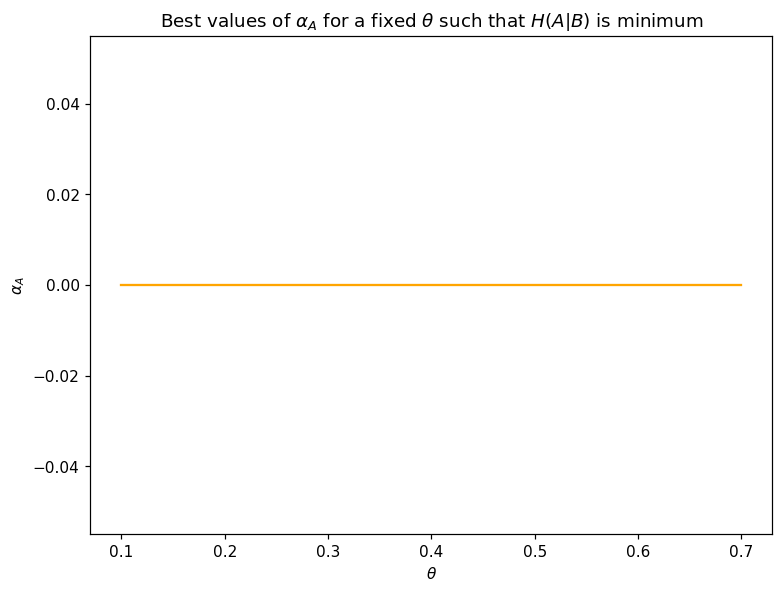

In [272]:
Thetas = np.arange(0.1, np.pi/4, 0.1)
As = np.arange(0.1, np.pi/4, 0.1)
i = 0
for t in Thetas:
    As[i] = min_a(t)
    i += 1

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Thetas, As, color="orange")
plt.title('Best values of ' r'$\alpha_A$' ' for a fixed ' r'$\theta$' ' such that ' r'$H(A|B)$' ' is minimum')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\alpha_A$')
plt.show()  

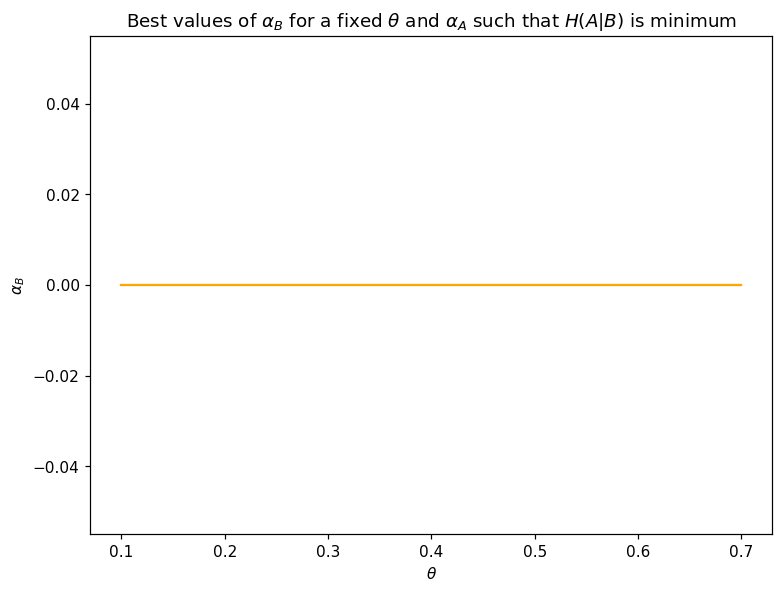

In [273]:
Thetas = np.arange(0.1, np.pi/4, 0.1)
Bs = np.arange(0.1, np.pi/4, 0.1)
i = 0
for t in Thetas:
    Bs[i] = min_b(t,min_a(t))
    i += 1

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Thetas, Bs, color="orange")
plt.title('Best values of ' r'$\alpha_B$' ' for a fixed ' r'$\theta$' ' and ' r'$\alpha_A$' ' such that ' r'$H(A|B)$' ' is minimum')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\alpha_B$')
plt.show()  

### Upper bound on the entanglement 

In [274]:
def SQ_state3(p):
    if (1+p)/2 > 0 and (1-p)/2 > 0:
        return 1+((1+p)/4)*np.log2((1+p)/2)+((1-p)/4)*np.log2((1-p)/2)
    elif (1-p)/2 == 0:
        return 1+((1+p)/4)*np.log2((1+p)/2)+0

In [275]:
def SQ_state4(p):
    if (1+p)/2 > 0 and (1-p)/2 > 0:
        return 1+(3*(1-p)/8)*np.log2(3*(1-p)/4)+((1+3*p)/8)*np.log2((1+3*p)/4)
    elif (1-p)/4 == 0:
        return 1+0+((1+3*p)/8)*np.log2((1+3*p)/4)

In [276]:
def SQ_state5(p):
    if (1+p)/4 > 0 and (1-p)/4 > 0:
        return 1+((1+p)/4)*np.log2((1+p)/4)+((1-p)/4)*np.log2((1-p)/4)
    elif (1-p)/4 == 0:
        return 1+((1+p)/4)*np.log2((1+p)/4)

In [277]:
def SQ_state6(t):
    if np.cos(t) == 0:
        return -0-2*(np.sin(t)**2)*np.log2(np.sin(t))
    elif np.sin(t) == 0:
        return -2*(np.cos(t)**2)*np.log2(np.cos(t))-0
    else:
        return -2*(np.cos(t)**2)*np.log2(np.cos(t))-2*(np.sin(t)**2)*np.log2(np.sin(t))

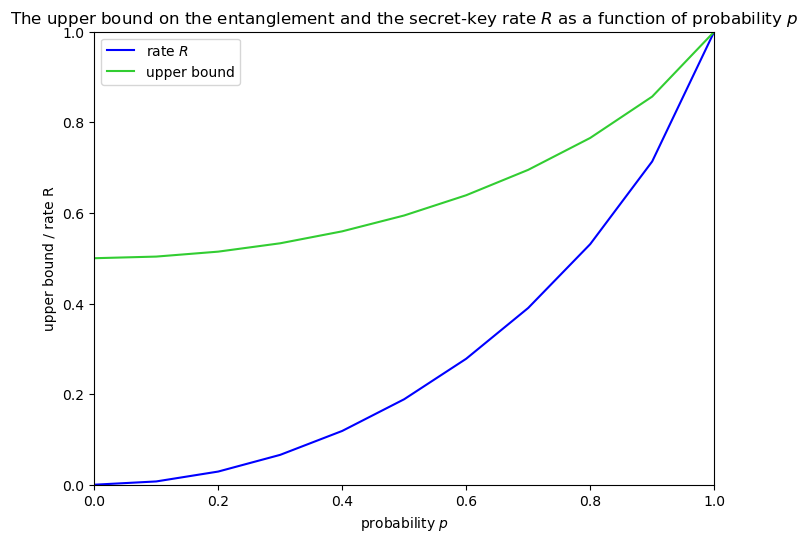

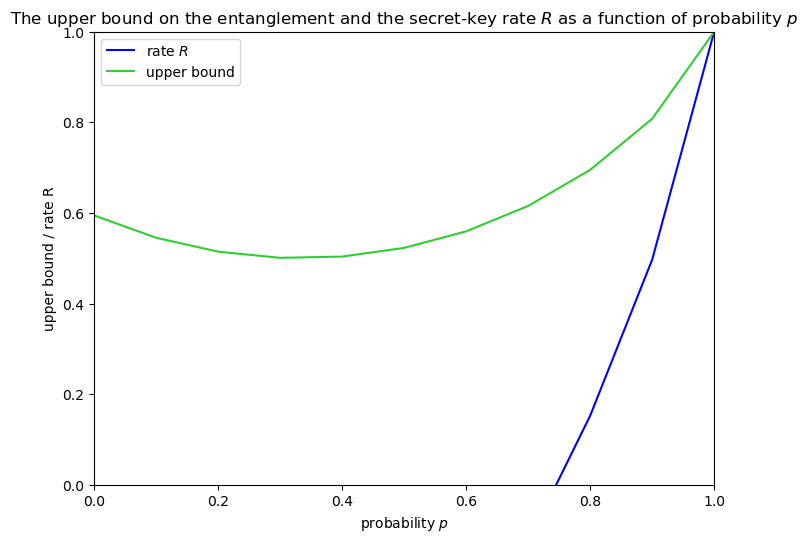

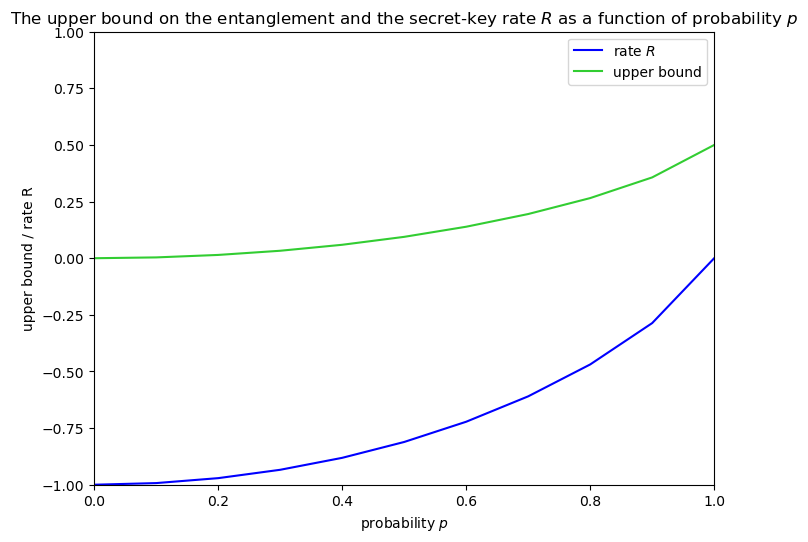

In [286]:
############## states 3 & 4 & 5 ###############

Proba = np.arange(0, 1.1, 0.1)
SQ3 = np.arange(0, 1.1, 0.1)
R3 = np.arange(0, 1.1, 0.1)
SQ4 = np.arange(0, 1.1, 0.1)
R4 = np.arange(0, 1.1, 0.1)
SQ5 = np.arange(0, 1.1, 0.1)
R5 = np.arange(0, 1.1, 0.1)

i = 0
for p in Proba:
    SQ3[i] = SQ_state3(p)
    R3[i] = rate_state3(p)
    SQ4[i] = SQ_state4(p)
    R4[i] = rate_state4(p)
    SQ5[i] = SQ_state5(p)
    R5[i] = rate_state5(p)
    i += 1

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(Proba, R3, label='rate ' r'$R$', color="blue")
plt.plot(Proba, SQ3, label='upper bound', color="limegreen")
plt.legend(fontsize=10)
plt.title('The upper bound on the entanglement and the secret-key rate ' r'$R$' ' as a function of probability ' r'$p$')
plt.xlabel('probability ' r'$p$')
plt.ylabel('upper bound / rate R')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show() 

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(Proba, R4, label='rate ' r'$R$', color="blue")
plt.plot(Proba, SQ4, label='upper bound', color="limegreen")
plt.legend(fontsize=10)
plt.title('The upper bound on the entanglement and the secret-key rate ' r'$R$' ' as a function of probability ' r'$p$')
plt.xlabel('probability ' r'$p$')
plt.ylabel('upper bound / rate R')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show() 

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(Proba, R5, label='rate ' r'$R$', color="blue")
plt.plot(Proba, SQ5, label='upper bound', color="limegreen")
plt.legend(fontsize=10)
plt.title('The upper bound on the entanglement and the secret-key rate ' r'$R$' ' as a function of probability ' r'$p$')
plt.xlabel('probability ' r'$p$')
plt.ylabel('upper bound / rate R')
plt.ylim(-1, 1)
plt.xlim(0, 1)
plt.show() 

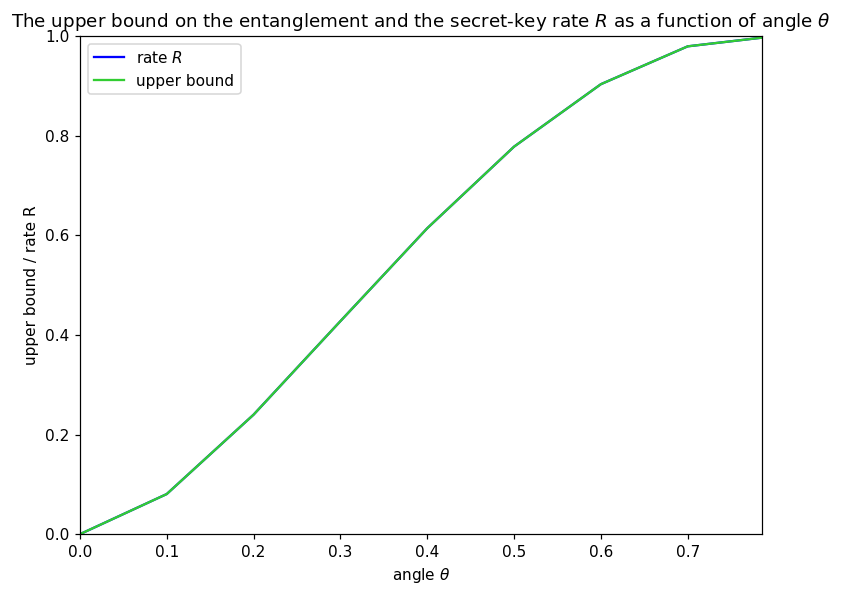

In [283]:
############## state 6 ###############

Thetas = np.arange(0, np.pi/4+0.1, 0.1)
SQ6 = np.arange(0, np.pi/4+0.1, 0.1)
R6 = np.arange(0, np.pi/4+0.1, 0.1)

i = 0
for t in Thetas:
    SQ6[i] = SQ_state6(t)
    R6[i] = rate_state6(t)
    i += 1

plt.figure(figsize=(8, 6), dpi=110)
plt.plot(Thetas, R6, label='rate ' r'$R$', color="blue")
plt.plot(Thetas, SQ6, label='upper bound', color="limegreen")
plt.legend(fontsize=10)
plt.title('The upper bound on the entanglement and the secret-key rate ' r'$R$' ' as a function of angle ' r'$\theta$')
plt.xlabel('angle ' r'$\theta$')
plt.ylabel('upper bound / rate R')
plt.ylim(0, 1)
plt.xlim(0, np.pi/4)
plt.show() 